In [46]:
import os

# # Get the current working directory and go up one level to reach root
# DATA_DIR = os.path.join(os.getcwd(), '..', 'data')
# print(f"Data directory: {DATA_DIR}")

# # list contents of the data directory
# print(os.listdir(DATA_DIR))

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Add this to help Python find the module
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

In [47]:
data = pd.read_csv('data/merged_data.csv')

# Print the first few rows of the merged data
print(display(data.head()))

# Print information about the merged data
print(data.info())

,timestamp,heart_rate,stress,respiration,body_battery,spo2,hrv,sleep_score,valence,arousal,emotion,hue,saturation,brightness
0,2025-04-01T22:02:00Z,64.0,31.0,18.0,NaN,94.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-04-01T22:04:00Z,63.0,31.0,17.0,NaN,94.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-04-01T22:06:00Z,64.0,28.0,16.0,NaN,94.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-04-01T22:08:00Z,65.0,28.0,17.0,NaN,94.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-04-01T22:10:00Z,65.0,28.0,17.0,NaN,94.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16931 entries, 0 to 16930
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     16931 non-null  object 
 1   heart_rate    16928 non-null  float64
 2   stress        16931 non-null  float64
 3   respiration   16931 non-null  float64
 4   body_battery  14509 non-null  float64
 5   spo2          12658 non-null  float64
 6   hrv           0 non-null      float64
 7   sleep_score   15022 non-null  float64
 8   valence       54 non-null     float64
 9   arousal       54 non-null     float64
 10  emotion       54 non-null     object 
 11  hue           19 non-null     float64
 12  saturation    19 non-null     float64
 13  brightness    19 non-null     float64
dtypes: float64(12), object(2)
memory usage: 1.8+ MB
None


In [48]:
def create_datasets(df):
    """Create separate datasets for valence, arousal, and emotion labels"""
    # Get physiological features
    physiological_cols = ['heart_rate', 'stress', 'respiration', 'body_battery', 'spo2', 'hrv', 'sleep_score']
    available_cols = [col for col in physiological_cols if col in df.columns]
    
    # Create base features DataFrame
    features = df[['timestamp'] + available_cols].copy()
    
    # Create valence dataset
    valence_data = features.copy()
    valence_data['valence'] = df['valence']
    valence_data = valence_data.dropna(subset=['valence'])
    print(f"Valence dataset shape: {valence_data.shape}")
    
    # Create arousal dataset
    arousal_data = features.copy()
    arousal_data['arousal'] = df['arousal']
    arousal_data = arousal_data.dropna(subset=['arousal'])
    print(f"Arousal dataset shape: {arousal_data.shape}")
    
    # Create emotion labels dataset
    emotion_data = features.copy()
    emotion_data['emotion'] = df['emotion']
    emotion_data = emotion_data.dropna(subset=['emotion'])
    print(f"Emotion dataset shape: {emotion_data.shape}")
    
    # Save datasets
    valence_data.to_csv('data/valence_dataset.csv', index=False)
    arousal_data.to_csv('data/arousal_dataset.csv', index=False)
    emotion_data.to_csv('data/emotion_dataset.csv', index=False)
    
    # Print some statistics
    print("\nValence statistics:")
    print(valence_data['valence'].describe())
    print("\nArousal statistics:")
    print(arousal_data['arousal'].describe())
    print("\nEmotion distribution:")
    print(emotion_data['emotion'].value_counts())
    
    return valence_data, arousal_data, emotion_data


valence_data, arousal_data, emotion_data = create_datasets(data)

Valence dataset shape: (54, 9)
Arousal dataset shape: (54, 9)
Emotion dataset shape: (54, 9)

Valence statistics:
count    54.000000
mean      0.128490
std       0.688475
min      -1.050000
25%      -0.449181
50%       0.090000
75%       0.754286
max       0.990000
Name: valence, dtype: float64

Arousal statistics:
count    54.000000
mean      0.311768
std       0.517453
min      -0.650000
25%      -0.010000
50%       0.460000
75%       0.732857
max       1.010000
Name: arousal, dtype: float64

Emotion distribution:
emotion
Happy       15
Neutral      8
Anxious      7
Excited      7
Sad          7
Stressed     4
Tense        2
Content      2
Calm         1
Angry        1
Name: count, dtype: int64


# PLOTS

## Valence

## Arousal

## Labels

In [34]:
# Plot distribution of valence and arousal
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(labeled_data['valence'], kde=True)
plt.title('Distribution of Valence')
plt.xlabel('Valence')

plt.subplot(1, 2, 2)
sns.histplot(labeled_data['arousal'], kde=True)
plt.title('Distribution of Arousal')
plt.xlabel('Arousal')

plt.tight_layout()
plt.show()
plt.savefig('valence_arousal_distributions.png')
plt.close()

In [35]:
# Plot valence-arousal scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=labeled_data, x='valence', y='arousal', hue='emotion', alpha=0.7)
plt.title('Valence-Arousal Scatter Plot')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('plots/valence_arousal_scatter.png')
plt.close()

In [36]:
# Analyze emotion distribution
print("\nEmotion distribution:")
emotion_counts = labeled_data['emotion'].value_counts()
print(emotion_counts)

# Plot emotion distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('plots/emotion_distribution.png')
plt.close()


Emotion distribution:
emotion
Happy       15
Neutral      8
Anxious      7
Excited      7
Sad          7
Stressed     4
Tense        2
Content      2
Calm         1
Angry        1
Name: count, dtype: int64



Correlation between physiological signals and valence/arousal:


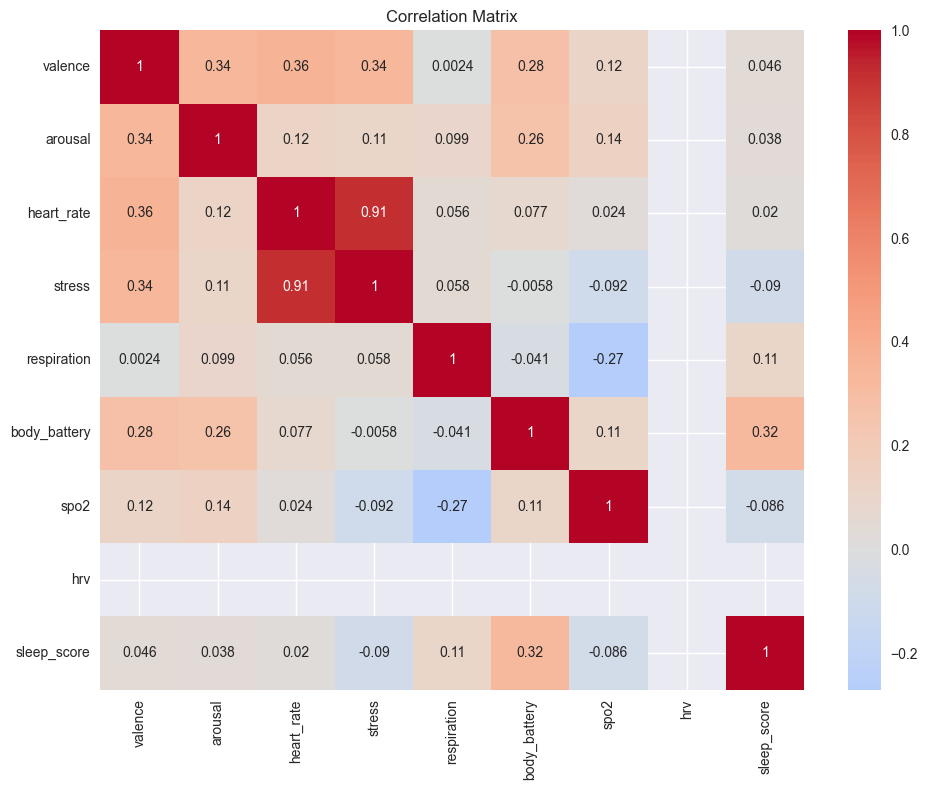


Top correlations with valence:
heart_rate    0.361792
arousal       0.344539
stress        0.337555
Name: valence, dtype: float64

Top correlations with arousal:
valence         0.344539
body_battery    0.260319
spo2            0.137900
Name: arousal, dtype: float64


In [ ]:
# Analyze correlation between physiological signals and emotions
physiological_cols = ['heart_rate', 'stress', 'respiration', 'body_battery', 'spo2', 'hrv', 'sleep_score']
available_cols = [col for col in physiological_cols if col in labeled_data.columns]

if available_cols:
    print("\nCorrelation between physiological signals and valence/arousal:")
    corr_matrix = labeled_data[['valence', 'arousal'] + available_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    plt.savefig('plots/correlation_matrix.png')
    plt.close()
    
    # Print top correlations
    valence_corr = corr_matrix['valence'].sort_values(ascending=False)
    arousal_corr = corr_matrix['arousal'].sort_values(ascending=False)
    print("\nTop correlations with valence:")
    print(valence_corr[1:4])  # Skip valence itself
    print("\nTop correlations with arousal:")
    print(arousal_corr[1:4])  # Skip arousal itself
